In [2]:
#import drawSvg and save it as draw (for convenience)

import drawSvg as draw

In [3]:
#create a canvas thats 300x300 pixels

d = draw.Drawing( 300, 300, origin = "center" )

In [4]:
#set all of the colors; make them variables so that you can change it. 

bg_color = "navy" 
#background circle color

text_color = "white" 
#text color

arc_color = "gold" 
#arc and accent color for outer stroke

In [5]:
#set the background circle color

d.append( draw.Circle( 0, 0, 100, fill=bg_color , stroke=arc_color , stroke_width=5 ) )

In [6]:
#draw the zero/power symbol in the center

d.append( draw.Circle( 0, 0, 25, fill=bg_color, stroke=text_color, stroke_width=5 ) ) 
#creates the circle

d.append( draw.Lines( 0, 12, 0, 37, stroke=text_color, stroke_width=5 ) )
#creates the power symbol line

d.append( draw.Lines( 5, 12, 5, 37, stroke=bg_color, stroke_width=5 ) )
#creates the negative space on right of the line

d.append( draw.Lines( -5, 12, -5, 37, stroke=bg_color, stroke_width=5 ) ) 
#creates the negative space on left of the line

In [7]:
#draw the upper arc

upper_arc = draw.ArcLine( 0, 0, 50, 27, 150,
            stroke=arc_color, stroke_width=2, fill="none", fill_opacity=0.2 )

d.append( upper_arc )

# BELOW IS NOTES FOR MYSELF, ArcLine Variables:
#          the first variable is the x axis of the center of the circle. 
#          the second variable is the y axis of the center of the circle.
#          the third variable is the radius of the circle
#          the fourth variable adjusts the right point
#          the fifth variable adjusts the left point

In [8]:
#draw the invisible upper path (up) for text "The Power Of"

up = draw.Path( stroke_width=2, stroke=bg_color, fill="none" )
up.M( -55, 27 )  # Start path at point (-10, 20)
up.C( -7, 95, 42, 50, 55, 25 )  # Draw a curve to (55, 25)
#the up.M and up.C functions are necessary set-up for draw.Path()

d.append( up )

In [9]:
#draw the lower arc

lower_arc = draw.ArcLine( 0, 0, 50, -150, -25,
            stroke=arc_color, stroke_width=2, fill="none", fill_opacity=0.2 )

d.append( lower_arc )

In [10]:
#draw the lower path (LP but lowercase) for text "Python"

lp = draw.Path( stroke_width=2, stroke=bg_color, fill="none" )
lp.M( -50, -25 )  # Start path at point (-50, -25)
lp.C( -5, -90, 40, -40, 55, -25 )  # Draw a curve to (55, -25)
#the lp.M and lp.C functions are necessary set-up for draw.Path()


d.append( lp )

In [11]:
#add all of the text elements, the 2, the 6, "the power of", and "python"

d.append( draw.Text( "2", 60, -70, -20, fill=text_color ) )
#adds the number 2

d.append( draw.Text( "6", 60, 40, -20, fill=text_color ) )
#adds the number 6

d.append( draw.Text( "The Power Of", 20, path=up, text_anchor="middle", fill=text_color ) )
#adds "The Power Of"

d.append(draw.Text( "Python", 20, path=lp, text_anchor="middle", valign="top", fill=text_color ) )
#adds "Python"

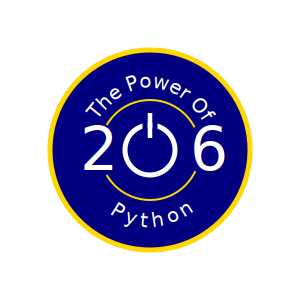

In [12]:
#show the final logo
d